# Case Study

In [1]:
import numpy as np

from scipy.io import savemat
import scipy.io as sio

import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.interpolate import interp1d

import andes
import ams

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=30)
ams.config_logger(stream_level=40)

In [4]:
!andes misc --version

Python  3.12.0
andes   1.9.3.post51+g005049af
numpy   2.0.2
kvxopt  1.3.2.1
sympy   1.13.3
scipy   1.15.2
pandas  2.2.3
numba   0.60.0


In this study, we use the same OPF case cause the only difference is the `StaticGen.genfuel` and it will not impact the OPF results.

The dynamic cases are:

``1.IL200_dyn_20wt.xlsx``, 20% wind penetration with IEEEG1

``2.IL200_dyn_20wt_ts.xlsx``, 20% wind penetration with IEEEG1 replaced by IEEEG1TS2

``3.IL200_dyn_50wt.xlsx``, 50% wind penetration with IEEEG1

``4.IL200_dyn_50wt_ts.xlsx``, 50% wind penetration with IEEEG1 replaced by IEEEG1TS2

``5.IL200_dyn_80wt.xlsx``, 80% wind penetration with IEEEG1

``6.IL200_dyn_80wt_ts.xlsx``, 80% wind penetration with IEEEG1 replaced by IEEEG1TS2

In [5]:
opf_cases = ['./../cases/IL200_opf_20wt.xlsx',
             './../cases/IL200_opf_50wt.xlsx',
             './../cases/IL200_opf_80wt.xlsx',]
sp1 = ams.load(opf_cases[0],
               setup=True, no_output=True,
               default_config=True)
sp2 = ams.load(opf_cases[0],
               setup=True, no_output=True,
               default_config=True)
sp3 = ams.load(opf_cases[1],
               setup=True, no_output=True,
               default_config=True)
sp4 = ams.load(opf_cases[1],
               setup=True, no_output=True,
               default_config=True)
sp5 = ams.load(opf_cases[2],
               setup=True, no_output=True,
               default_config=True)
sp6 = ams.load(opf_cases[2],
               setup=True, no_output=True,
               default_config=True)

dy_cases = ['./../cases/1.IL200_dyn_20wt.xlsx',
            './../cases/2.IL200_dyn_20wt_ts.xlsx',
            './../cases/3.IL200_dyn_50wt.xlsx',
            './../cases/4.IL200_dyn_50wt_ts.xlsx',
            './../cases/5.IL200_dyn_80wt.xlsx',
            './../cases/6.IL200_dyn_80wt_ts.xlsx',]

s1 = sp1.to_andes(addfile=dy_cases[0],
                  setup=False, no_output=True,
                  default_config=True)
s2 = sp2.to_andes(addfile=dy_cases[1],
                  setup=False, no_output=True,
                  default_config=True)
s3 = sp3.to_andes(addfile=dy_cases[2],
                  setup=False, no_output=True,
                  default_config=True)
s4 = sp4.to_andes(addfile=dy_cases[3],
                  setup=False, no_output=True,
                  default_config=True)
s5 = sp5.to_andes(addfile=dy_cases[4],
                  setup=False, no_output=True,
                  default_config=True)
s6 = sp6.to_andes(addfile=dy_cases[5],
                  setup=False, no_output=True,
                  default_config=True)

for ss in [s1, s2, s3, s4, s5, s6]:
    # add a Alter device to set load increase
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                           attr='v', method='+', amount=0.2))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_2', src='Ppf',
                           attr='v', method='+', amount=0.2))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_3', src='Ppf',
                           attr='v', method='+', amount=0.3))

    ss.setup()

# --- Modify any other parameters if necessary ---

Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.
Generating code for 1 models on 12 processes.


In [6]:
for ss in [sp1, sp2, sp3, sp4, sp5, sp6]:
    ss.DCOPF.run(solver='CLARABEL')
    ss.DCOPF.dc2ac()

In [7]:
sp1.dyn.send(adsys=s1, routine='DCOPF')
sp2.dyn.send(adsys=s2, routine='DCOPF')
sp3.dyn.send(adsys=s3, routine='DCOPF')
sp4.dyn.send(adsys=s4, routine='DCOPF')
sp5.dyn.send(adsys=s5, routine='DCOPF')
sp6.dyn.send(adsys=s6, routine='DCOPF')

True

In [8]:
for ss in [s1, s2, s3, s4, s5, s6]:
    # Constant load
    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    ss.PFlow.run()

    _ = ss.TDS.init()

GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_31 | 0      | 1    


GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_31 | 0      | 1    


GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_26 | 0      | 1    
 GENROU_27 | 0      | 1    
 GENROU_28 | 0      | 1    
 GENROU_29 | 0      | 1    
 GENROU_30 | 0      | 1    
 GENROU_31 | 0      | 1    


GENROU (vf range) out of typical lower li

In [9]:
for ss in [s1, s2, s3, s4, s5, s6]:

    ss.TDS.config.tf = 200
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True

    ss.TDS.run()

<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.27385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.21695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.37947 at t=1. Previous value was 0.07947.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.27385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.21695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.37947 at t=1. Previous value was 0.07947.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.27385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.21695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.37947 at t=1. Previous value was 0.07947.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.27385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.21695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.37947 at t=1. Previous value was 0.07947.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.27385 at t=1. P

In [10]:
legends = [r'Case1: IEEEG1 20% Wind',
           r'Case2: IEEEG1TS2 20% Wind',
           r'Case3: IEEEG1 50% Wind',
           r'Case4: IEEEG1TS2 50% Wind',
           r'Case5: IEEEG1 80% Wind',
           r'Case6: IEEEG1TS2 80% Wind']
colors = ['tab:blue', 'tab:orange', 'tab:green',
          'tab:red', 'tab:purple', 'tab:brown']
linestyles = ['-', '--', '-.', ':', '-', '--']

In [11]:
# Extract time and frequency series (only save s2)
for i, ss in zip([2, 4, 6], [s2, s4, s6]):
    t = ss.dae.ts.t  # time vector
    omega_s = ss.dae.ts.xy[:, ss.dae.xy_name.index('omega GENROU 47')] * ss.config.freq

    # build a dictionary for MATLAB
    mat_data = {
        't': t,
        'omega_s': omega_s
    }

    # Export to .mat file
    savemat(f'./../results/andes_data_s{i}.mat', mat_data)

The exported three cases ANDES data, are then used in the ``identify.m`` script to identify the system parameters, and ``sfr_result_80wind.mat`` is one of the generated files.

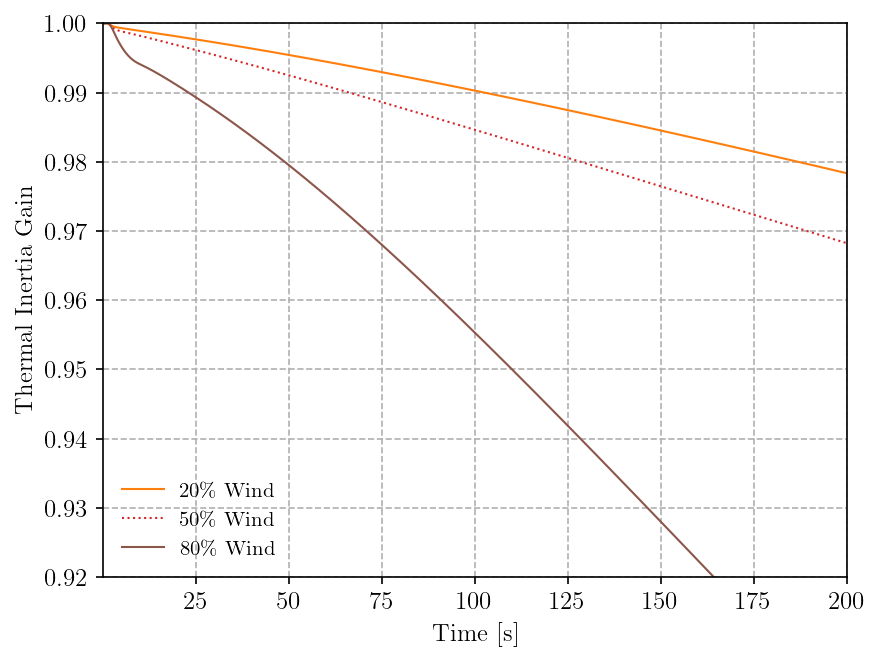

In [12]:
ieeeg1_idx = 'IEEEG1_10'
fig1, ax1 = s2.TDS.plt.plot(s2.IEEEG1TS2.TS.y,
                            a=s2.IEEEG1TS2.idx2uid(ieeeg1_idx),
                            ymin=0.92, ymax=1.0001,
                            ycalc=lambda x: 1 - x,
                            show=False, grid=True,
                            ylabel='Thermal Inertia Gain',
                            yheader=[r'20\% Wind'],
                            color=colors[1],
                            linestyles=linestyles[1],
                            dpi=150)
_ = s4.TDS.plt.plot(s4.IEEEG1TS2.TS.y,
                    a=s4.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    ycalc=lambda x: 1 - x,
                    show=False,
                    yheader=[r'50\% Wind'],
                    color=colors[3],
                    linestyles=linestyles[3],
                    fig=fig1, ax=ax1)
_ = s6.TDS.plt.plot(s6.IEEEG1TS2.TS.y,
                    a=s6.IEEEG1TS2.idx2uid(ieeeg1_idx),
                    ycalc=lambda x: 1 - x,
                    show=False,
                    yheader=[r'80\% Wind'],
                    color=colors[5],
                    linestyles=linestyles[5],
                    fig=fig1, ax=ax1)

ax1.legend(loc='lower left', fontsize=10, frameon=False,)

fig1.savefig('./../results/Pressure.pdf', bbox_inches='tight')

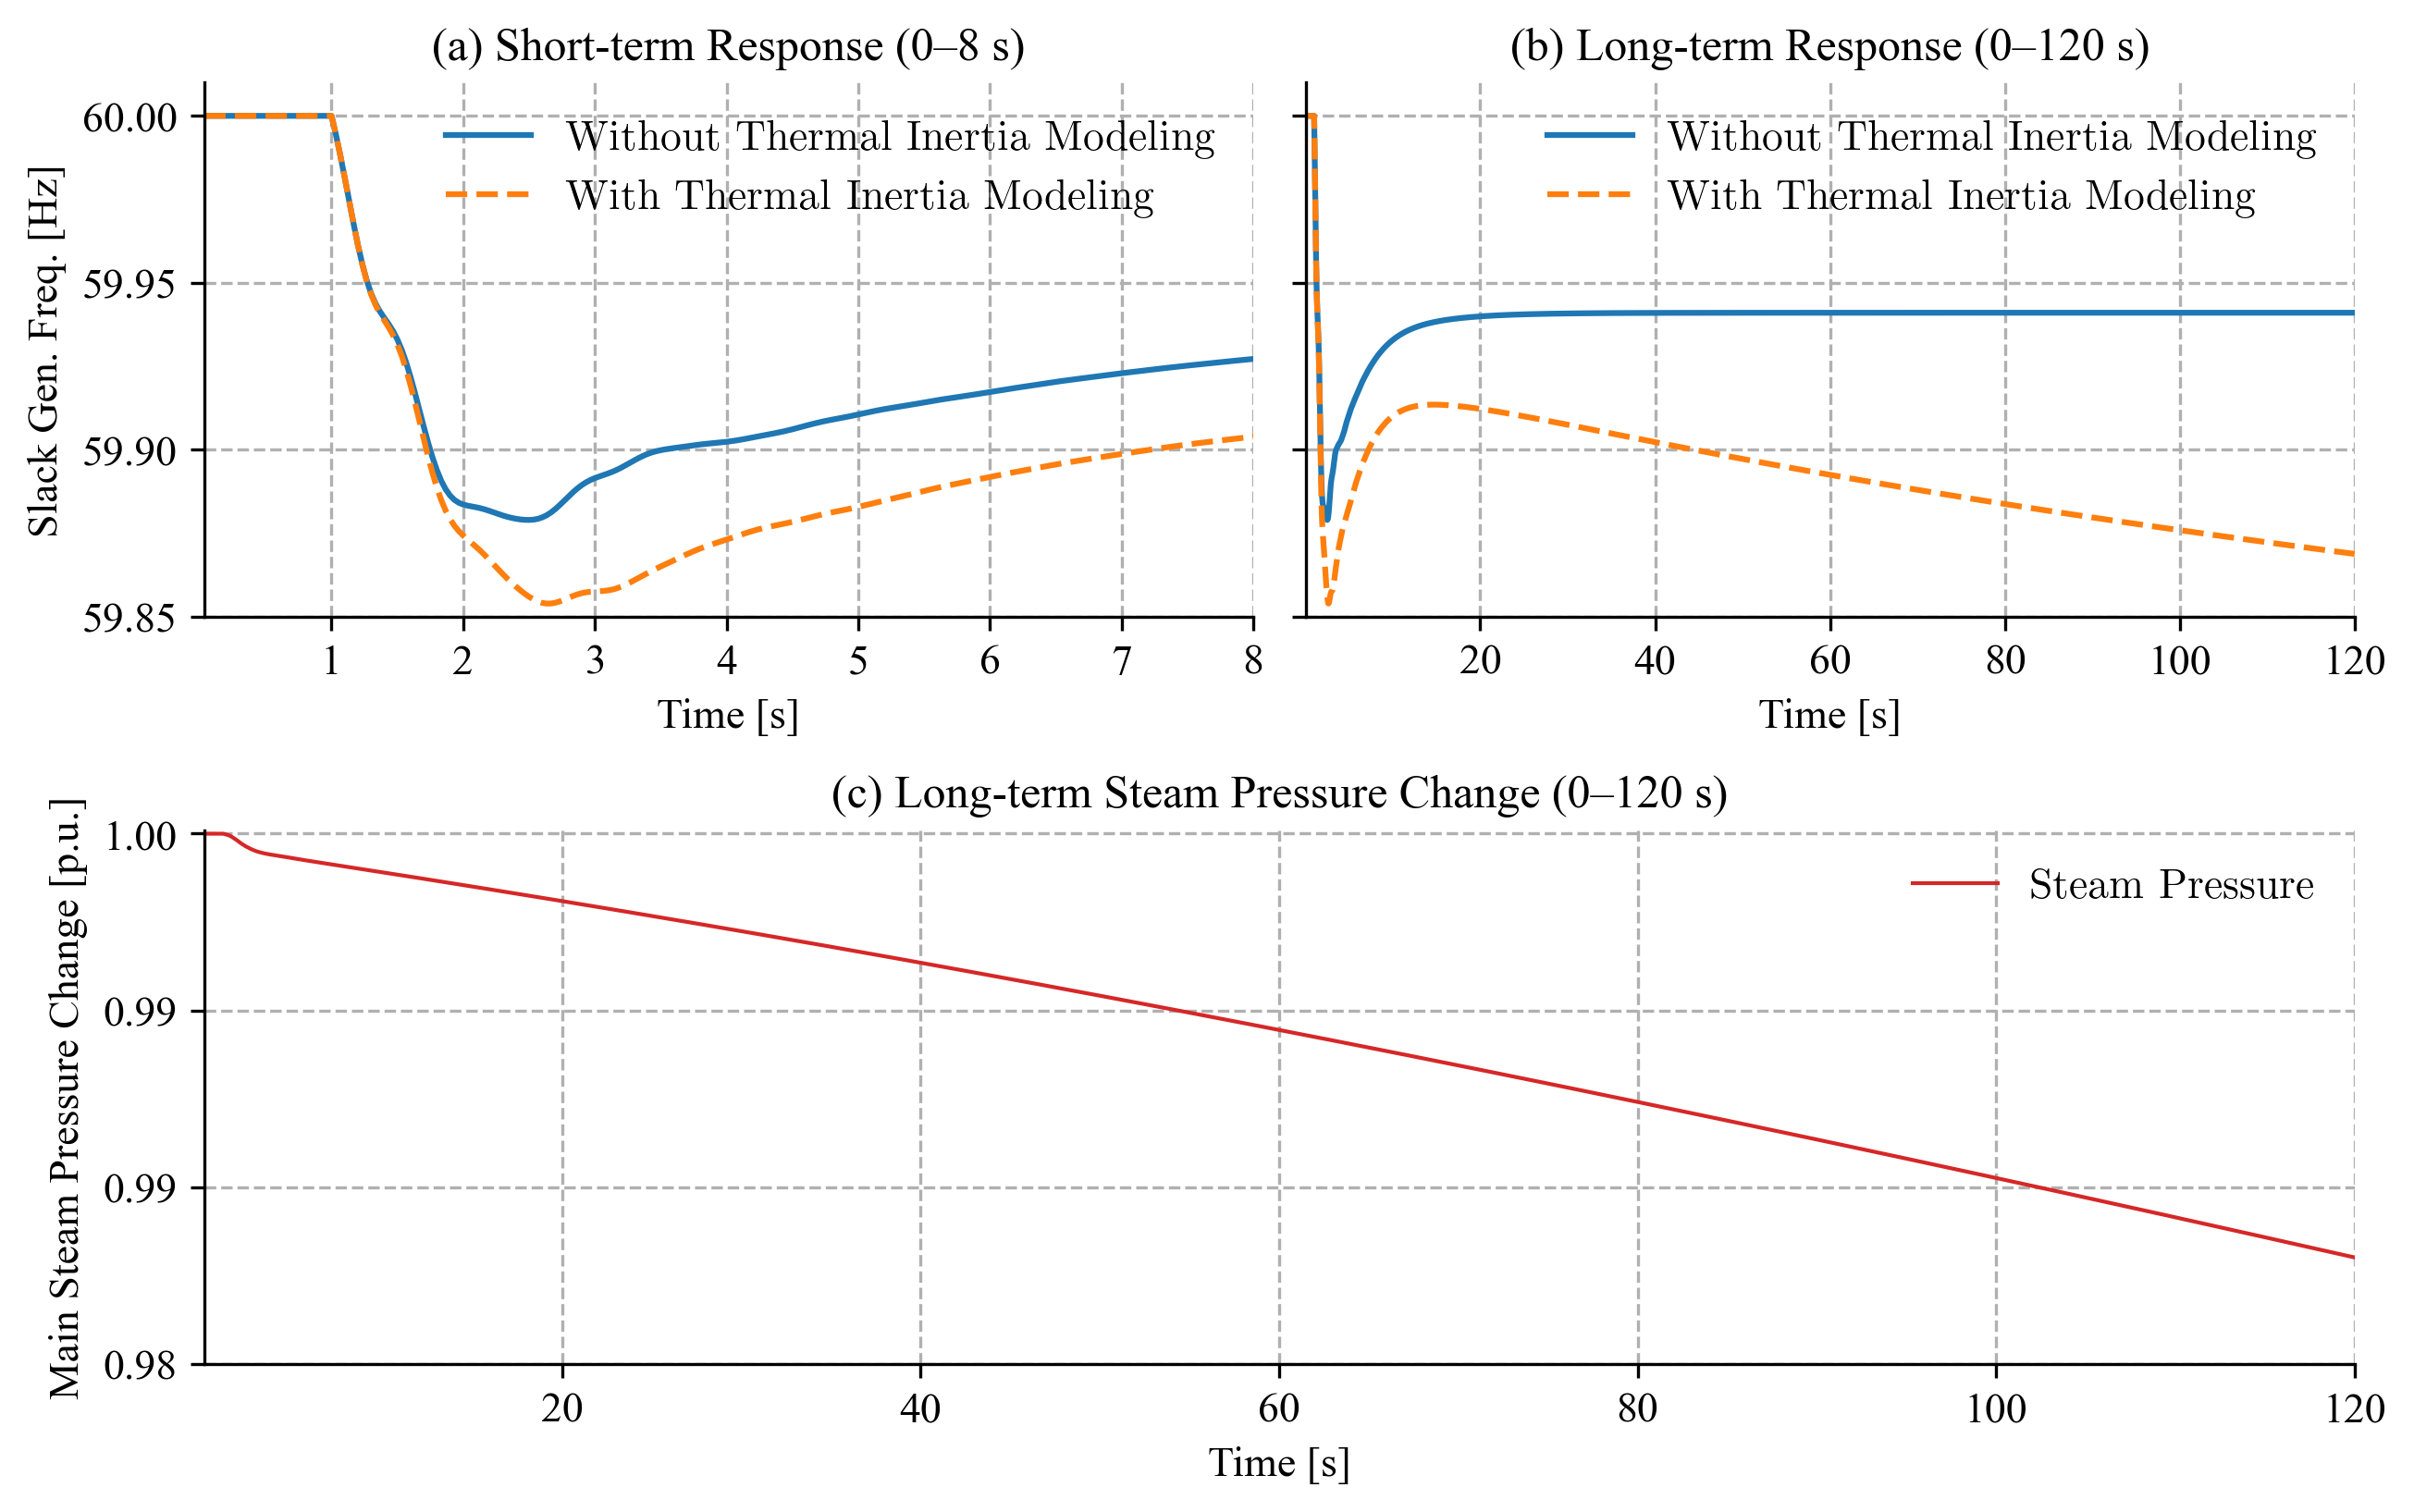

In [13]:
plt.style.use('default')

# build a 2x2 grid for the figure
figa = plt.figure(figsize=(10, 6), dpi=300)
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

# define three subplots
ax1 = figa.add_subplot(gs[0, 0])
ax2 = figa.add_subplot(gs[0, 1])
# set the second row to span both columns
ax3 = figa.add_subplot(gs[1, :])

plt.subplots_adjust(wspace=0.05, hspace=0.4)

fmin, fmax = 59.85, 60.01
tmin, tmax = 0, 8
linewidth = 1.5
genrou_idx = 'GENROU_47'

# left: short-term response, without and with thermal inertia
_ = s1.TDS.plt.plot(
    s1.GENROU.omega,
    a=s1.GENROU.idx2uid(genrou_idx),
    left=tmin, right=tmax,
    ymin=fmin, ymax=fmax,
    ytimes=s1.config.freq,
    show=False, grid=True,
    ylabel='Slack Gen. Freq. [Hz]',
    yheader=['Without Thermal Inertia Modeling'],
    colors=[colors[0]],
    linestyles=[linestyles[0]],
    line_width=linewidth,
    fig=figa, ax=ax1,
)
_ = s2.TDS.plt.plot(
    s2.GENROU.omega,
    a=s2.GENROU.idx2uid(genrou_idx),
    left=tmin, right=tmax,
    ytimes=s2.config.freq,
    show=False,
    yheader=['With Thermal Inertia Modeling'],
    colors=[colors[1]],
    linestyles=[linestyles[1]],
    line_width=linewidth,
    fig=figa, ax=ax1,
)

# right: long-term response, without and with thermal inertia
_ = s1.TDS.plt.plot(
    s1.GENROU.omega,
    a=s1.GENROU.idx2uid(genrou_idx),
    left=tmin, right=120,
    ymin=fmin, ymax=fmax,
    ytimes=s1.config.freq,
    show=False, grid=True,
    ylabel='',
    yheader=['Without Thermal Inertia Modeling'],
    colors=[colors[0]],
    linestyles=[linestyles[0]],
    line_width=linewidth,
    fig=figa, ax=ax2,
)
_ = s2.TDS.plt.plot(
    s2.GENROU.omega,
    a=s2.GENROU.idx2uid(genrou_idx),
    left=tmin, right=120,
    ytimes=s2.config.freq,
    show=False,
    yheader=['With Thermal Inertia Modeling'],
    colors=[colors[1]],
    linestyles=[linestyles[1]],
    line_width=linewidth,
    fig=figa, ax=ax2,
)

# wide plot: main steam pressure change
_ = s2.TDS.plt.plot(
    s2.IEEEG1TS2.TS.y,
    a=s2.IEEEG1TS2.idx2uid(ieeeg1_idx),
    ymin=0.985, ymax=1.0001,
    left=tmin, right=120,
    ycalc=lambda x: 1 - x,
    show=False, grid=True,
    ylabel='Main Steam Pressure Change [p.u.]',
    yheader=['Steam Pressure'],
    color=colors[3],
    linestyles=linestyles[0],
    fig=figa, ax=ax3,)

# set font and format for all axes
for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(fontsize=11, loc='upper right', frameon=False)
    ax.tick_params(labelsize=11)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Times New Roman')
    ax.set_xlabel(ax.get_xlabel(), fontsize=11, fontname='Times New Roman')
    ax.set_ylabel(ax.get_ylabel(), fontsize=11, fontname='Times New Roman')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# set titles
ax1.set_title('(a) Short-term Response (0–8 s)', fontsize=12, fontname='Times New Roman')
ax2.set_title('(b) Long-term Response (0–120 s)', fontsize=12, fontname='Times New Roman')
ax2.tick_params(labelleft=False)
ax3.set_title('(c) Long-term Steam Pressure Change (0–120 s)', fontsize=12, fontname='Times New Roman')

figa.savefig('./../results/case1_20%wind_three_subplots.pdf', bbox_inches='tight')


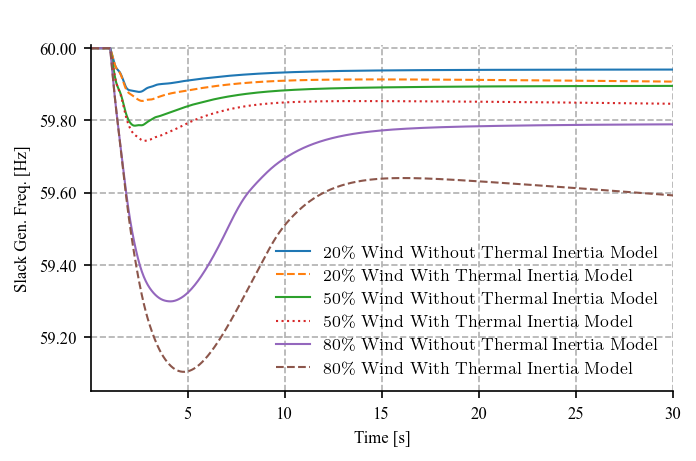

In [14]:
plt.style.use('default')

figb, axb = plt.subplots(figsize=(5, 3), dpi=150)
fmin, fmax = 59.05, 60.01
tmin, tmax = 0, 30
linewidth = 1.5
genrou_idx = 'GENROU_47'

# left: short-term response, without and with thermal inertia
_  = s1.TDS.plt.plot(s1.GENROU.omega,
                    a=s1.GENROU.idx2uid(genrou_idx),
                    ymin=fmin, ymax=fmax,
                    ytimes=s1.config.freq,
                    left=tmin, right=tmax,
                    show=False, grid=True,
                    ylabel='Slack Gen. Freq. [Hz]',
                    yheader=[r'20\% Wind Without Thermal Inertia Model'],
                    colors=[colors[0]],
                    linestyles=[linestyles[0]],
                    fig=figb, ax=axb,)
_ = s2.TDS.plt.plot(s2.GENROU.omega,
                    a=s2.GENROU.idx2uid(genrou_idx),
                    ytimes=s2.config.freq,
                    left=tmin, right=tmax,
                    show=False,
                    yheader=[r'20\% Wind With Thermal Inertia Model'],
                    colors=[colors[1]],
                    linestyles=[linestyles[1]],
                    fig=figb, ax=axb,)
_  = s3.TDS.plt.plot(s3.GENROU.omega,
                    a=s3.GENROU.idx2uid(genrou_idx),
                    left=tmin, right=tmax,
                    ytimes=s3.config.freq,
                    show=False, grid=True,
                    ylabel='Slack Gen. Freq. [Hz]',
                    yheader=[r'50\% Wind Without Thermal Inertia Model'],
                    colors=[colors[0]],
                    linestyles=[linestyles[0]],
                    fig=figb, ax=axb,
                    )         
_ = s4.TDS.plt.plot(s4.GENROU.omega,
                    a=s4.GENROU.idx2uid(genrou_idx),
                    ytimes=s4.config.freq,
                    left=tmin, right=tmax,
                    show=False,
                    yheader=[r'50\% Wind With Thermal Inertia Model'],
                    colors=[colors[3]],
                    linestyles=[linestyles[3]],
                    fig=figb, ax=axb,)
_ = s5.TDS.plt.plot(s5.GENROU.omega,
                    a=s5.GENROU.idx2uid(genrou_idx),
                    left=tmin, right=tmax,
                    ytimes=s5.config.freq,
                    show=False,
                    yheader=[r'80\% Wind Without Thermal Inertia Model'],
                    colors=[colors[4]],
                    linestyles=[linestyles[4]],
                    fig=figb, ax=axb,)
_ = s6.TDS.plt.plot(s6.GENROU.omega,
                    a=s6.GENROU.idx2uid(genrou_idx),
                    ytimes=s6.config.freq,
                    left=tmin, right=tmax,
                    show=False,
                    colors=[colors[5]],
                    yheader=[r'80\% Wind With Thermal Inertia Model'],
                    linestyles=[linestyles[5]],
                    fig=figb, ax=axb,)


# set font and format for all axes
for ax in [axb]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(fontsize=8, loc='lower right', frameon=False)
    ax.tick_params(labelsize=8)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Times New Roman')
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, fontname='Times New Roman')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, fontname='Times New Roman')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.set_title(' ', fontsize=12, fontname='Times New Roman')

figb.savefig('./../results/case2_50wind_three_freq.pdf', bbox_inches='tight')


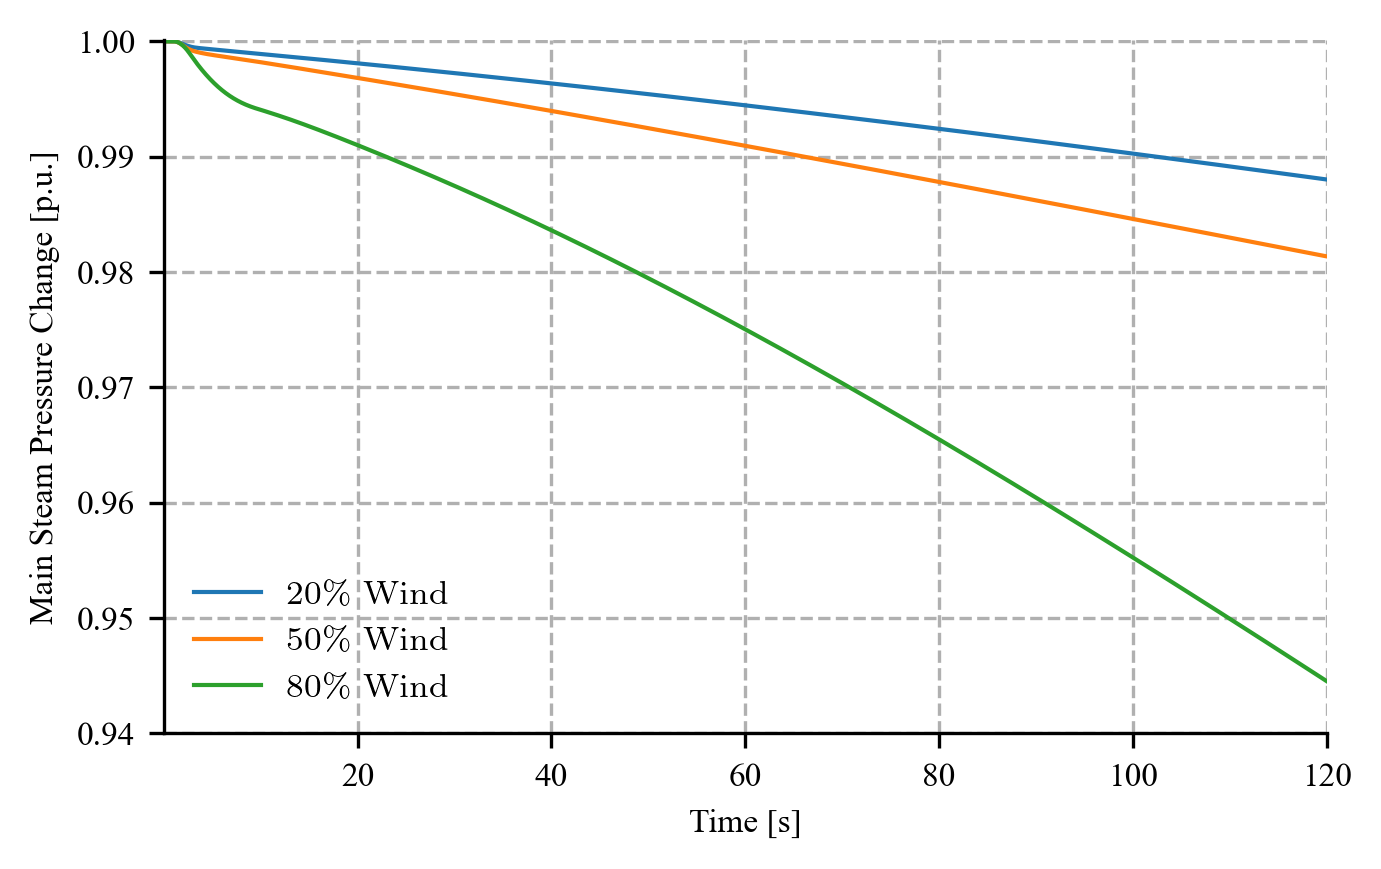

In [15]:
plt.style.use('default')

figc,axc = plt.subplots(figsize=(5, 3), dpi=300)

fmin, fmax = 59.05, 60.01
tmin, tmax = 0, 120
linewidth = 1.5
genrou_idx = 'GENROU_47'


# left: long-term response
_ = s2.TDS.plt.plot(
    s2.IEEEG1TS2.TS.y,
    a=s2.IEEEG1TS2.idx2uid(ieeeg1_idx),
    ymin=0.94, ymax=1.0001,
    left=tmin, right=120,
    ycalc=lambda x: 1 - x,
    show=False, grid=True,
    ylabel='Main Steam Pressure Change [p.u.]',
    yheader=[r'20\% Wind'],
    color=colors[0],
    linestyles=linestyles[0],
    fig=figc, ax=axc,)
_ = s4.TDS.plt.plot(
    s4.IEEEG1TS2.TS.y,
    a=s4.IEEEG1TS2.idx2uid(ieeeg1_idx),
    left=tmin, right=120,
    ycalc=lambda x: 1 - x,
    show=False, grid=True,
    ylabel='Main Steam Pressure Change [p.u.]',
    yheader=[r'50\% Wind'],
    color=colors[1],
    linestyles=linestyles[1],
    fig=figc, ax=axc,)
_ = s6.TDS.plt.plot(
    s6.IEEEG1TS2.TS.y,
    a=s6.IEEEG1TS2.idx2uid(ieeeg1_idx),
    left=tmin, right=120,
    ycalc=lambda x: 1 - x,
    show=False, grid=True,
    ylabel='Main Steam Pressure Change [p.u.]',
    yheader=[r'80\% Wind'],
    color=colors[2],
    linestyles=linestyles[2],
    fig=figc, ax=axc,)

# set font and format for all axes
for ax in [axc]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(fontsize=8, loc='lower left', frameon=False)
    ax.tick_params(labelsize=8)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Times New Roman')
    ax.set_xlabel('Time [s]', fontsize=8, fontname='Times New Roman')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8, fontname='Times New Roman')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

axc.set_title('', fontsize=12, fontname='Times New Roman')
figc.savefig('./../results/case3_three_steampressure_subplots.pdf', bbox_inches='tight')


/var/folders/__/n5kx_m_s0tbg6n5qd7rh51700000gn/T/ipykernel_14120/1936434151.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


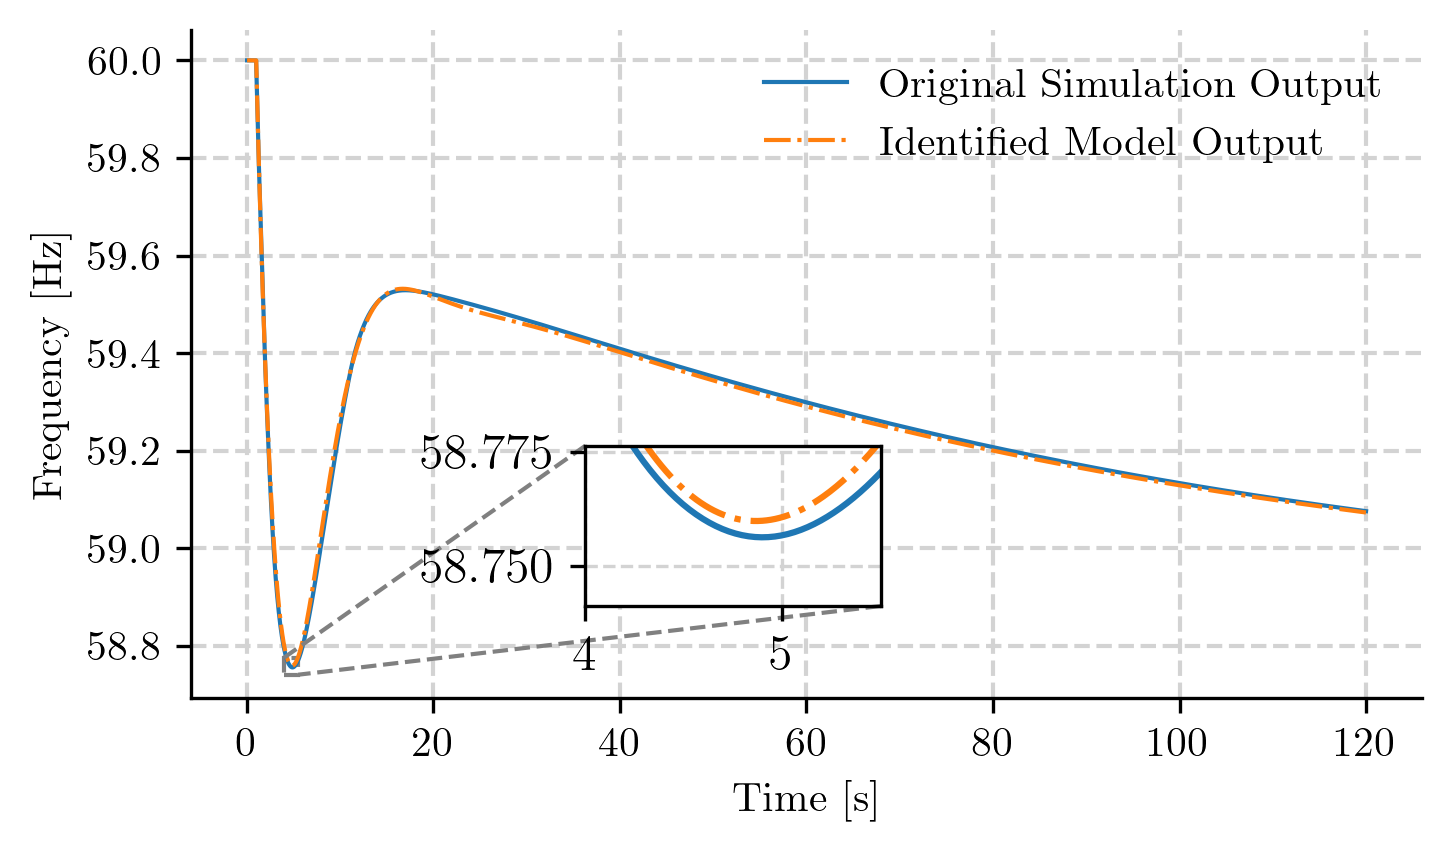

In [16]:
# load the .mat file
data = sio.loadmat('./../results/sfr_result_80wind.mat')

t = data['t'].flatten()
f_sim = data['f_sim'].flatten()
t_uniform = data['t_uniform'].flatten()
f_fit = data['f_fit'].flatten()

# filter the original simulation data (t <= 120)
mask_sim = t <= 120
t_plot = t[mask_sim]
f_sim_plot = f_sim[mask_sim]

# filter the identified model data (t_uniform <= 120)
mask_fit = t_uniform <= 120
t_fit_plot = t_uniform[mask_fit]
f_fit_plot = f_fit[mask_fit]

fig, ax = plt.subplots(figsize=(5, 3), dpi=300)

ax.plot(t_plot, f_sim_plot, label='Original Simulation Output', color=colors[0], linewidth=1)
ax.plot(t_fit_plot, f_fit_plot, label='Identified Model Output', color=colors[1], linestyle='-.', linewidth=1)
ax.grid(True, linestyle='--', linewidth=1, color='lightgray')

ax.set_xlabel('Time [s]', fontsize=10, fontname='Times New Roman')
ax.set_ylabel('Frequency [Hz]', fontsize=10, fontname='Times New Roman')
ax.set_title('', fontsize=12, fontname='Times New Roman')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

axins = inset_axes(ax, width="60%", height="60%", loc='lower left',
                   bbox_to_anchor=(0.3, 0.1, 0.4, 0.4), bbox_transform=ax.transAxes)

axins.plot(t_plot, f_sim_plot, color=colors[0])
axins.plot(t_fit_plot, f_fit_plot, color=colors[1], linestyle='-.')

x1, x2 = 4, 5.5
y1, y2 = np.min(f_sim_plot)-0.015, np.min(f_sim_plot)+0.02
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.grid(True, linestyle='--', color='lightgray')

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="gray",linestyle='--')

ax.grid(True)
ax.legend(fontsize=10, frameon=False, loc='best')
ax.tick_params(labelsize=10)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname('Times New Roman')

plt.tight_layout()
plt.savefig('./../results/case4_sfr_validation_80wind_120s.pdf', bbox_inches='tight')
plt.show()

In [17]:
# interpolation and identification
interp_sim = interp1d(t_plot, f_sim_plot, kind='linear', fill_value='extrapolate')
f_sim_interp = interp_sim(t_fit_plot)

# calculation
# Nadir & Nadir Time
nadir_sim = np.min(f_sim_plot)
t_nadir_sim = t_plot[np.argmin(f_sim_plot)]

nadir_fit = np.min(f_fit_plot)
t_nadir_fit = t_fit_plot[np.argmin(f_fit_plot)]

nadir_diff = abs(nadir_sim - nadir_fit)

# NRMSE
nrmse = np.linalg.norm(f_fit_plot - f_sim_interp) / np.linalg.norm(f_sim_interp)

# MAE
mae = np.mean(np.abs(f_fit_plot - f_sim_interp))

# Max absolute error
max_abs_error = np.max(np.abs(f_fit_plot - f_sim_interp))

print("=== SFR Model Identification Accuracy Metrics ===")
print(f"Original Simulation Nadir:    {nadir_sim:.4f} Hz at {t_nadir_sim:.2f} s")
print(f"Identified Model Nadir:       {nadir_fit:.4f} Hz at {t_nadir_fit:.2f} s")
print(f"Nadir Difference:             {nadir_diff:.4f} Hz")
print(f"Mean Absolute Error (MAE):    {mae:.4f} Hz")
print(f"Max Absolute Error:           {max_abs_error:.4f} Hz")
print(f"NRMSE:                        {nrmse:.6f}")

=== SFR Model Identification Accuracy Metrics ===
Original Simulation Nadir:    58.7563 Hz at 4.90 s
Identified Model Nadir:       58.7599 Hz at 4.86 s
Nadir Difference:             0.0036 Hz
Mean Absolute Error (MAE):    0.0069 Hz
Max Absolute Error:           0.0231 Hz
NRMSE:                        0.000131


TODO: Explain how to use ``nadir_calculate_dt_C2.m``